# RNN층의 순전파
- RNN의 구조와 구현 방법을 수식과 코드로 설명한다.
- RNN은 일반적인 신경망과 마찬가지로 '층'을 이용해 구현하며, 먼저 순전파에 대해 살펴본다.

## 순전파 개요

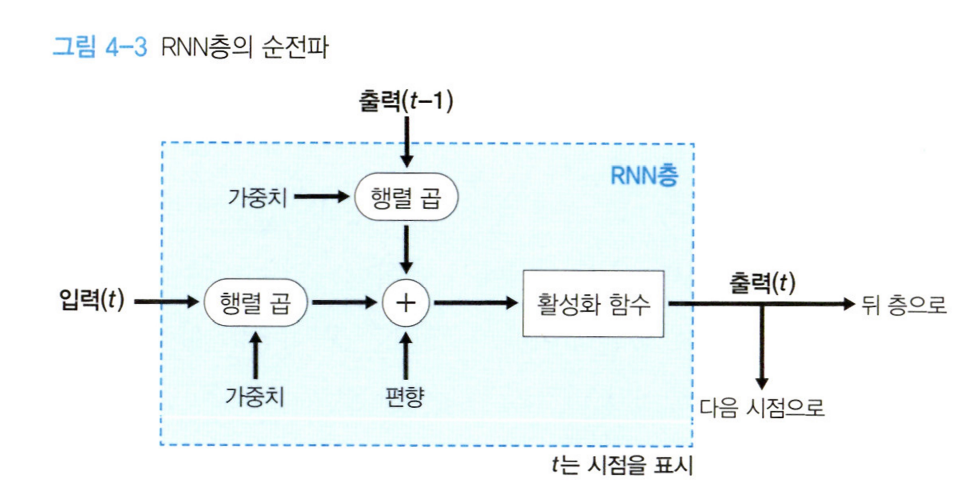

- 현 시점에서의 입력에 가중치 행렬을 곱한 값에 직전 시점의 출력에 가중치 행렬을 곱한 값을 더하고, 편향을 더해 모든 합을 구한 다음, 이 합을 활성화 함수로 처리해 현 시점에서의 출력값으로 계산한다.
- 현 시점의 출력은 뒤 층 또는 다음 시점으로 순전파된다.
- 전 결합층에서는 다음 행렬 식으로 순전파를 나타낼 수 있다.

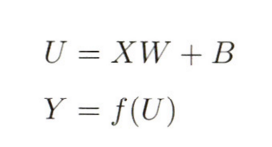

- RNN층에서는 위의 식을 발전시킨 아래 식으로 순전파를 표현할 수 있다.

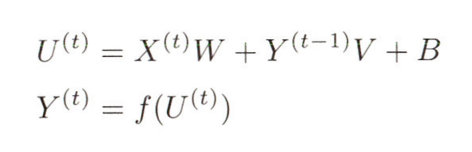

- 이 식에서 $X^{(t)}$는 현 시점 $t$에서의 입력, $W$는 그 값에 곱하는 가중치 행렬, $Y^{(t-1)}$은 한 시점 이전의 출력, $V$는 그 값에 곱하는 가중치 행렬, $B$는 편향, $f$는 활성화 함수이다.
- $V$와 $W$는 서로 다른 가중치 행렬이고, 시점에 상관없이 동일한 값을 갖는다. 
- 편향 $B$를 행렬로 표시하지만 실제로는 벡터이다.
- 수식을 맞추기 위해 동일한 벡터를 여러 행으로 나열한 행렬로 변환시킨다.

## 순전파 수식
- 행렬 내부를 살펴본다.
- 활성화 함수에 입력하기 전의 값인 $U^{(t)}$ 행렬 원소를 다음과 같이 표시할 수 있다.

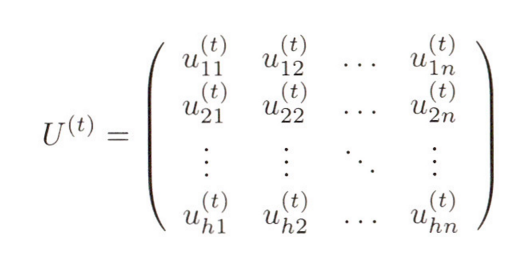

- 각 행은 배치 내의 샘플이고 각 열은 해당 층에서의 뉴런을 표시한다.
- $u^{(t)}_{12}$는 배치 내의 첫 번째 샘플, 층 내의 두번째 뉴런, 시점 $t$에서의 수치 값이다.

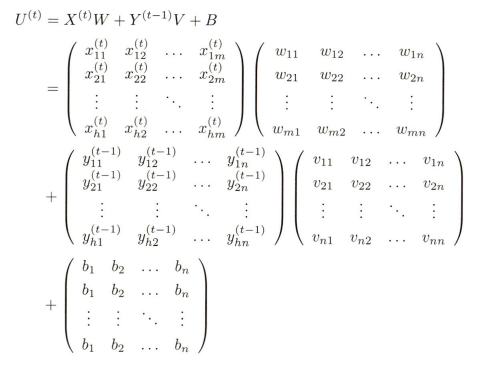

- $V$는 이전 시점의 출력과 현 시점에서의 출력 수가 동일하기 때문에 정방행렬이고 $W$는 정방행렬이 아닐 수도 있다.
- $B$는 계산을 위해 편향 행벡터를 수직 방향으로 늘린 행렬이다.

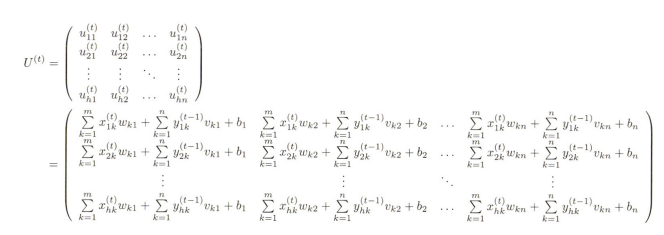

- 각 원소는 총합 기호 시그마($Σ$)를 사용해 표시 가능.
- 이 값을 활성화 함수에 입력하면 아래 식으로 표시할 수 있다.

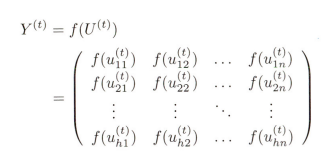

- $U$의 각 원소를 활성화 함수 $f$로 계산한다.

## 순전파를 코드로 구현
- 행렬을 사용한 순전파 식을 코드로 구현한다.

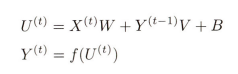

In [ ]:
# x: 입력 w: 가중치 y_prev: 이전 시점의 출력 v: 가중치 b: 편향 f: 활성화함수
u = np.dot(x, w) + np.dot(y_prev, v) + b
y = np.tanh(u)

- 각 시점에서 입력 x와 이전 시점의 출력 y_prev를 받아 각기 w와 v 행렬을 곱한 후 더하고, 여기에 다시 b를 더해 u를 만든다. 그리고 이 값을 활성화 함수인 tanh으로 계산하고 이 시점에서의 출력 y로 계산한다.
- tanh는 다음의 수식으로 표현되는 함수이다.

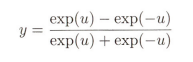

- $y$는 -1에서 1사이에서 변화하고 함수는 0을 중심으로 대칭 형태이다.
- tanh는 기울기 소실 문제를 방지할 수 있다는 장점 때문에 RNN에서 활성화 함수로 흔히 쓰인다.